## Import libraries

In [516]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## import dataset

In [517]:
df = pd.read_csv('HousingData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [518]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


#### Since the classification depends on CHAS column, therefore it cannot have missing data.

In [519]:
df.CHAS.fillna(df.CHAS.mode()[0], inplace=True)
df.CHAS.isna().sum()

0

# Outliers

In [520]:
for k, v in df.items():
    Q1 = v.quantile(0.25)
    Q3 = v.quantile(0.75)
    IQR = Q3 - Q1
    v_col = v[(v <= Q1 - 1.5 * IQR) | (v >= Q3 + 1.5 * IQR)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print(f"{k} has {perc:.2f}% outliers based on IQR")

CRIM has 12.85% outliers based on IQR
ZN has 12.45% outliers based on IQR
INDUS has 0.00% outliers based on IQR
CHAS has 100.00% outliers based on IQR
NOX has 0.00% outliers based on IQR
RM has 5.93% outliers based on IQR
AGE has 0.00% outliers based on IQR
DIS has 0.99% outliers based on IQR
RAD has 0.00% outliers based on IQR
TAX has 0.00% outliers based on IQR
PTRATIO has 2.96% outliers based on IQR
B has 15.22% outliers based on IQR
LSTAT has 1.38% outliers based on IQR
MEDV has 7.91% outliers based on IQR


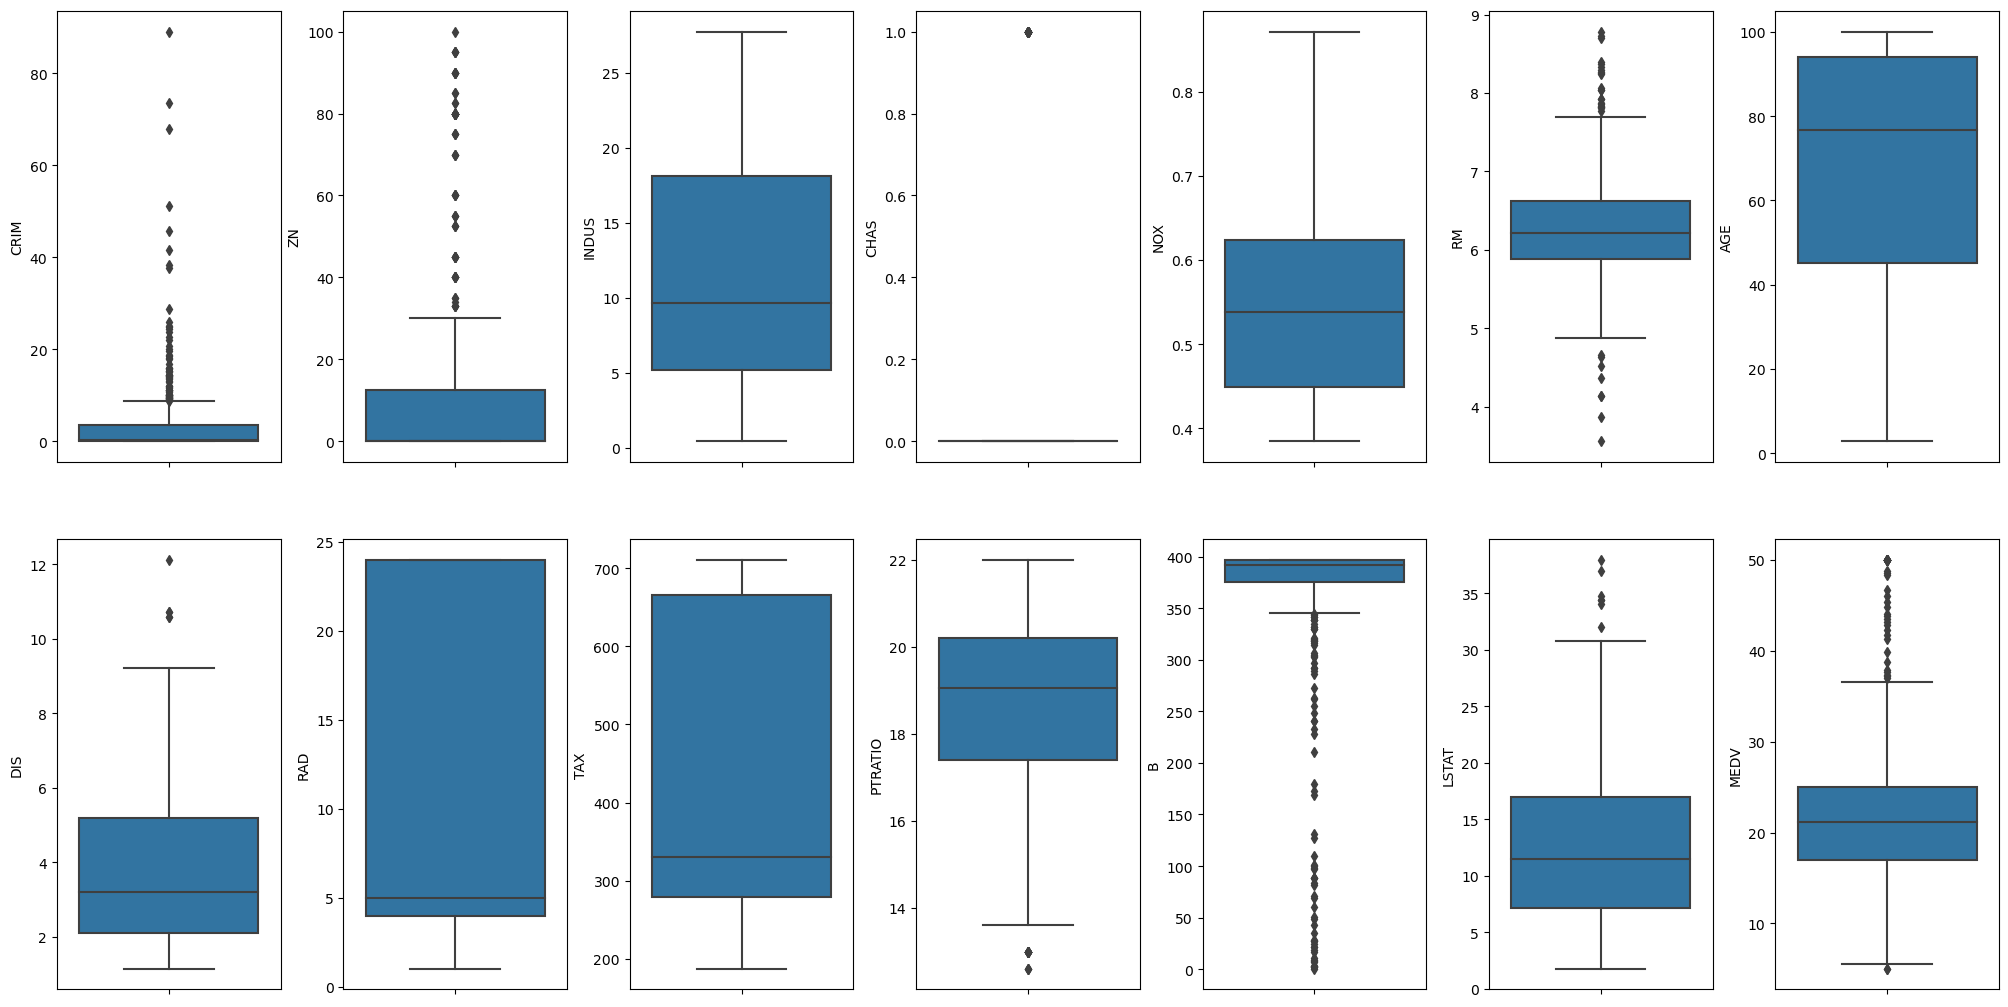

In [524]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [475]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### CRIM

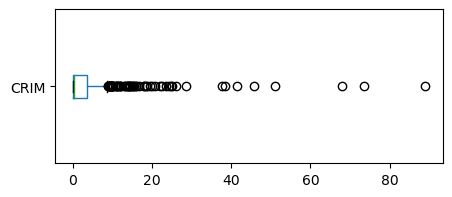

In [476]:
df.boxplot(column=['CRIM'],fontsize=10,rot=0,grid=False,figsize=(5,2), vert=False)
plt.show()

In [477]:
Q1 = df['CRIM'].quantile(0.25)
Q3 = df['CRIM'].quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1 =',Q1)
print('Q3 =',Q3)
print('IQR =',IQR) 
print('Min =',LB)
print('Max =',UB)

Q1 = 0.0819
Q3 = 3.5602625000000003
IQR = 3.4783625000000002
Min = -5.135643750000001
Max = 8.777806250000001


In [478]:
df[(df['CRIM'] < LB) | (df['CRIM'] > UB)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
356,8.98296,0.0,18.1,1.0,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8
367,13.52220,0.0,18.1,NaN,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
373,11.10810,0.0,18.1,0.0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
374,18.49820,0.0,18.1,0.0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,15.57570,0.0,18.1,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13,19.1
469,13.07510,0.0,18.1,0.0,0.580,5.713,56.7,2.8237,24,666,20.2,396.90,14.76,20.1
477,15.02340,0.0,18.1,0.0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
478,10.23300,0.0,18.1,0.0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6


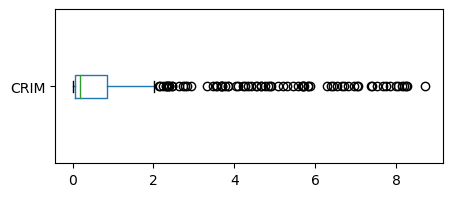

In [479]:
df['CRIM'][(df['CRIM'] < LB) | (df['CRIM'] > UB)] = np.median(df['CRIM'])

df.boxplot(column=['CRIM'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### ZN

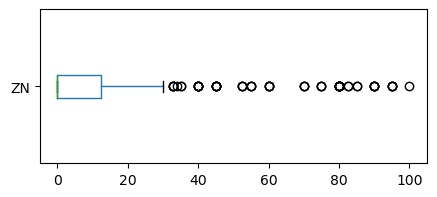

In [480]:
df.boxplot(column=['ZN'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [481]:
Q1 = df['ZN'].quantile(0.25)
Q3 = df['ZN'].quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1 =',Q1)
print('Q3 =',Q3)
print('IQR =',IQR) 
print('Min =',LB)
print('Max =',UB)

Q1 = 0.0
Q3 = 12.5
IQR = 12.5
Min = -18.75
Max = 31.25


In [482]:
df['ZN'][(df['ZN'] < LB) | (df['ZN'] > UB)]

39     75.0
40     75.0
54     75.0
55     90.0
56     85.0
       ... 
349    40.0
351    60.0
352    60.0
353    90.0
354    80.0
Name: ZN, Length: 63, dtype: float64

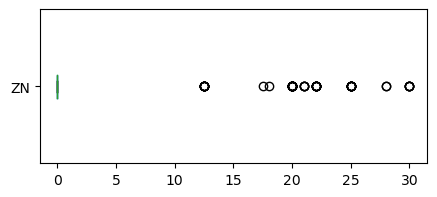

In [483]:
df['ZN'][(df['ZN'] < LB) | (df['ZN'] > UB)] = np.median(df['ZN'])

df.boxplot(column=['ZN'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### RM

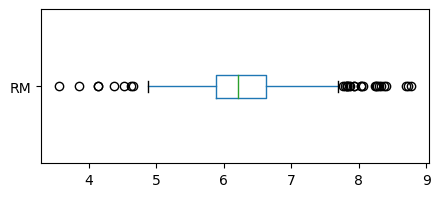

In [484]:
df.boxplot(column=['RM'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [485]:
Q1 = df['RM'].quantile(0.25)
Q3 = df['RM'].quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1 =',Q1)
print('Q3 =',Q3)
print('IQR =',IQR) 
print('Min =',LB)
print('Max =',UB)

Q1 = 5.8854999999999995
Q3 = 6.6235
IQR = 0.7380000000000004
Min = 4.778499999999999
Max = 7.730500000000001


In [486]:
df['RM'][(df['RM'] < LB) | (df['RM'] > UB)]

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
180    7.765
186    7.831
195    7.875
203    7.853
204    8.034
224    8.266
225    8.725
226    8.040
232    8.337
233    8.247
253    8.259
257    8.704
262    8.398
267    8.297
280    7.820
283    7.923
364    8.780
365    3.561
367    3.863
374    4.138
384    4.368
386    4.652
406    4.138
412    4.628
414    4.519
Name: RM, dtype: float64

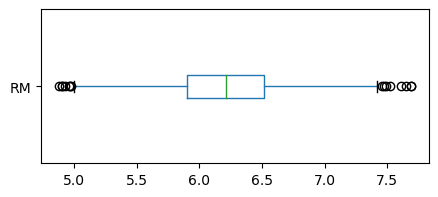

In [487]:
df['RM'][(df['RM'] < LB) | (df['RM'] > UB)] = np.median(df['RM'])

df.boxplot(column=['RM'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### DIS

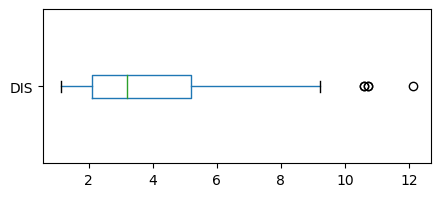

In [488]:
df.boxplot(column=['DIS'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [489]:
Q1 = df['DIS'].quantile(0.25)
Q3 = df['DIS'].quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1 =',Q1)
print('Q3 =',Q3)
print('IQR =',IQR) 
print('Min =',LB)
print('Max =',UB)

Q1 = 2.100175
Q3 = 5.1884250000000005
IQR = 3.0882500000000004
Min = -2.5322000000000005
Max = 9.820800000000002


In [490]:
df[(df['DIS'] < LB) | (df['DIS'] > UB)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
351,0.07950,NaN,1.69,0.0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
352,0.07244,NaN,1.69,0.0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
353,0.01709,NaN,2.02,0.0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
354,0.04301,NaN,1.91,0.0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
355,0.10659,NaN,1.91,0.0,0.413,5.936,NaN,10.5857,4,334,22.0,376.04,5.57,20.6


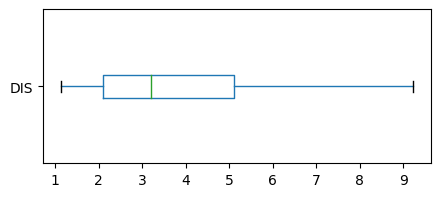

In [491]:
df['DIS'][(df['DIS'] < LB) | (df['DIS'] > UB)] = np.median(df['DIS'])
df.boxplot(column=['DIS'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### PTRATIO

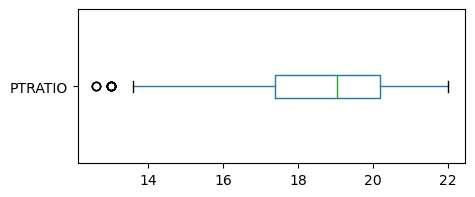

In [492]:
df.boxplot(column=['PTRATIO'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [493]:
Q1 = df['PTRATIO'].quantile(0.25)
Q3 = df['PTRATIO'].quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1 =',Q1)
print('Q3 =',Q3)
print('IQR =',IQR) 
print('Min =',LB)
print('Max =',UB)

Q1 = 17.4
Q3 = 20.2
IQR = 2.8000000000000007
Min = 13.199999999999998
Max = 24.4


In [494]:
df['PTRATIO'][(df['PTRATIO'] < LB) | (df['PTRATIO'] > UB)]

196    12.6
197    12.6
198    12.6
257    13.0
258    13.0
259    13.0
260    13.0
261    13.0
262    13.0
263    13.0
264    13.0
265    13.0
266    13.0
267    13.0
268    13.0
Name: PTRATIO, dtype: float64

In [495]:
df['PTRATIO'][(df['PTRATIO'] < LB) | (df['PTRATIO'] > UB)] = np.median(df['PTRATIO'])

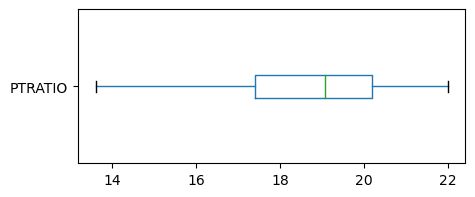

In [496]:
df.boxplot(column=['PTRATIO'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### B

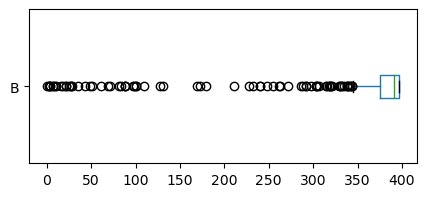

In [497]:
df.boxplot(column=['B'],fontsize=10,rot=0,grid=False,figsize=(5,2), vert=False)
plt.show()

In [498]:
Q1 = df['B'].quantile(0.25)
Q3 = df['B'].quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1 =',Q1)
print('Q3 =',Q3)
print('IQR =',IQR) 
print('Min =',LB)
print('Max =',UB)

Q1 = 375.3775
Q3 = 396.225
IQR = 20.847500000000025
Min = 344.10624999999993
Max = 427.49625000000003


In [499]:
df['B'][(df['B'] < LB) | (df['B'] > UB)]

18     288.99
25     303.42
27     306.38
32     232.60
34     248.31
        ...  
466     22.01
467    331.29
475    302.76
489    344.05
490    318.43
Name: B, Length: 77, dtype: float64

In [500]:
df['B'][(df['B'] < LB) | (df['B'] > UB)] = np.median(df['B'])

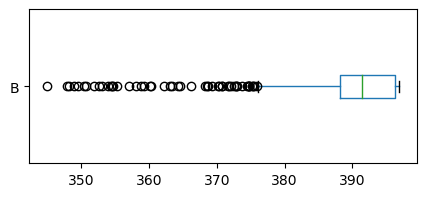

In [501]:
df.boxplot(column=['B'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### LSTAT

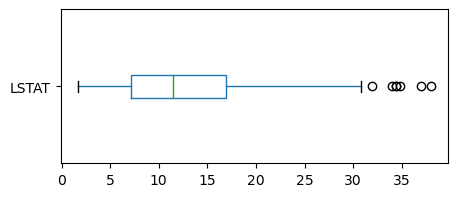

In [502]:
df.boxplot(column=['LSTAT'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [503]:
Q1 = df['LSTAT'].quantile(0.25)
Q3 = df['LSTAT'].quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1 =',Q1)
print('Q3 =',Q3)
print('IQR =',IQR) 
print('Min =',LB)
print('Max =',UB)

Q1 = 7.125
Q3 = 16.955000000000002
IQR = 9.830000000000002
Min = -7.620000000000003
Max = 31.700000000000003


In [504]:
df['LSTAT'][(df['LSTAT'] < LB) | (df['LSTAT'] > UB)]

141    34.41
373    34.77
374    37.97
387    31.99
412    34.37
414    36.98
438    34.02
Name: LSTAT, dtype: float64

In [505]:
df['B'][(df['B'] < LB) | (df['B'] > UB)] = np.median(df['B'])

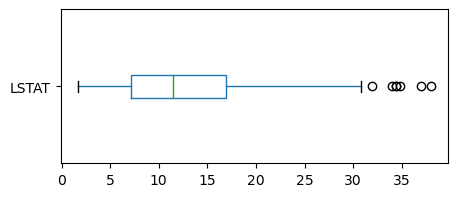

In [506]:
df.boxplot(column=['LSTAT'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### MEDV

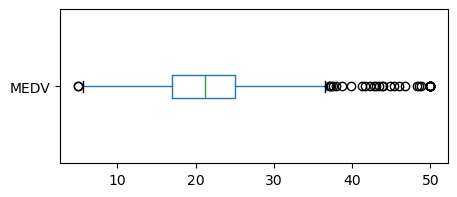

In [507]:
df.boxplot(column=['MEDV'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [508]:
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1 =',Q1)
print('Q3 =',Q3)
print('IQR =',IQR) 
print('Min =',LB)
print('Max =',UB)

Q1 = 17.025
Q3 = 25.0
IQR = 7.975000000000001
Min = 5.0624999999999964
Max = 36.962500000000006


In [509]:
df['MEDV'][(df['MEDV'] < LB) | (df['MEDV'] > UB)]

97     38.7
98     43.8
157    41.3
161    50.0
162    50.0
163    50.0
166    50.0
179    37.2
180    39.8
182    37.9
186    50.0
190    37.0
195    50.0
202    42.3
203    48.5
204    50.0
224    44.8
225    50.0
226    37.6
228    46.7
232    41.7
233    48.3
253    42.8
256    44.0
257    50.0
261    43.1
262    48.8
267    50.0
268    43.5
280    45.4
282    46.0
283    50.0
291    37.3
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
398     5.0
405     5.0
Name: MEDV, dtype: float64

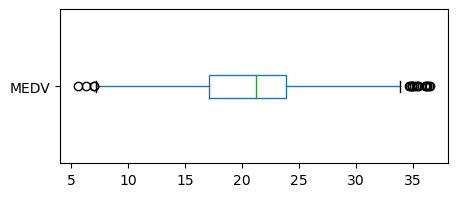

In [510]:
df['MEDV'][(df['MEDV'] < LB) | (df['MEDV'] > UB)] = np.median(df['MEDV'])
df.boxplot(column=['MEDV'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [511]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,421.000000,423.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,486.000000,506.000000
mean,1.131753,3.121749,11.083992,0.069959,0.554695,6.231747,68.518519,3.718598,9.549407,408.237154,18.637253,3.914450e+02,12.715432,20.757115
std,2.017701,7.695706,6.835896,0.255340,0.115878,0.517519,27.999513,1.980432,8.707259,168.537116,1.937389,4.608873e-12,7.155871,6.192007
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.880000,2.900000,1.129600,1.000000,187.000000,13.600000,3.914450e+02,1.730000,5.600000
25%,0.068600,0.000000,5.190000,0.000000,0.449000,5.899750,45.175000,2.100175,4.000000,279.000000,17.400000,3.914450e+02,7.125000,17.100000
50%,0.175050,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.203325,5.000000,330.000000,19.075000,3.914450e+02,11.430000,21.200000
75%,0.852040,0.000000,18.100000,0.000000,0.624000,6.515250,93.975000,5.112625,24.000000,666.000000,20.200000,3.914450e+02,16.955000,23.800000
max,8.716750,30.000000,27.740000,1.000000,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,22.000000,3.914450e+02,37.970000,36.500000


In [512]:
df.CHAS = df.CHAS.astype(str)
df.CHAS = df.CHAS.replace('0.0', '0')
df.CHAS = df.CHAS.replace('1.0', '1')

df.CHAS = df.CHAS.replace('nan', np.NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     421 non-null    float64
 1   ZN       423 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 55.5+ KB


In [514]:
df.to_csv('hd1_outlier_iqr.csv', index=False)